In [1]:
import numpy as np
import pandas as pd

In [2]:
df  = pd.read_csv('spam.csv', encoding = 'latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# dropping the last 3 columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace = True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#check missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#check for duplicate values

df.duplicated().sum()

403

In [14]:
#remove the duplicates

df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

## 2. Exploratory Data Analysis (EDA)

In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

It can be observed that the ratio of spam emails is much less compared to the sample ham emails.

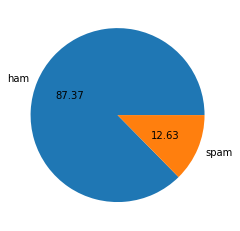

In [18]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [19]:
!pip install nltk

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\navya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
#gives the length of the text of spam and ham emails

df['num_characters'] = df['text'].apply(len)

In [22]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
#number of words

df['num_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
#number of sentences

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [25]:
df.head()

,target,text,num_characters,num_of_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df.describe()

,target,num_characters,num_of_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455407,1.961308
std,0.332253,58.236293,13.322448,1.432583
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [27]:
#the data when the messages are spam

df[df['target'] == 1][['num_characters','num_of_words','num_sentences']].describe()

,num_characters,num_of_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [28]:
#the data when the messages are ham

df[df['target'] == 0][['num_characters','num_of_words','num_sentences']].describe()

,num_characters,num_of_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


Conclusion: Spam messages are longer than Ham messages.

In [29]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

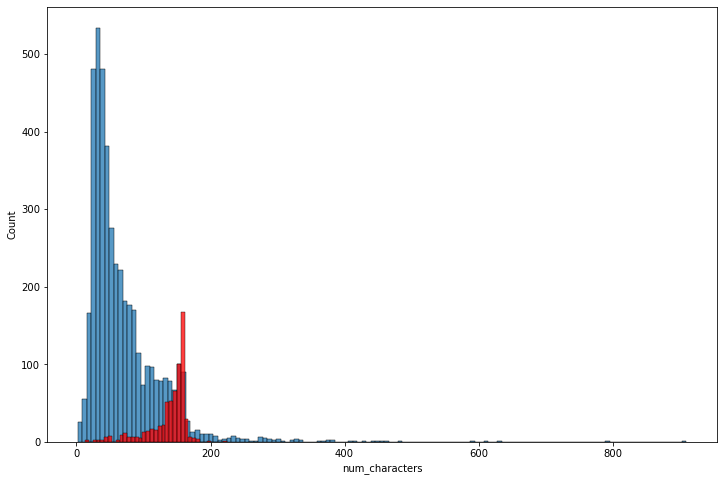

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'r')

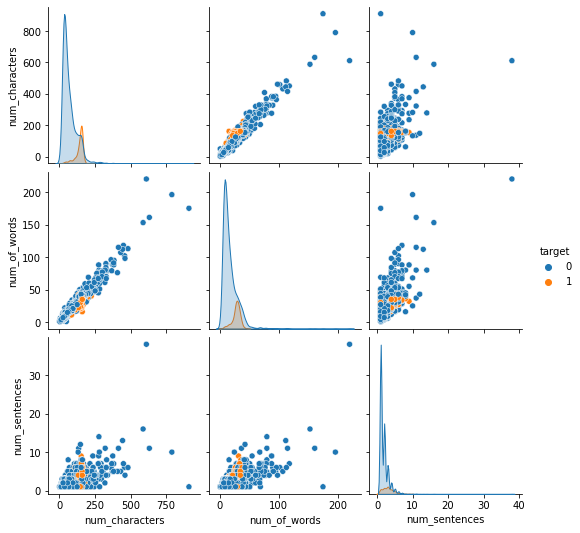

In [31]:
sns.pairplot(df, hue='target')

It can be analyzed that there are several outliers present in the dataset that can harm the classification

In [32]:
df[['target','num_characters','num_of_words','num_sentences']].corr()

,target,num_characters,num_of_words,num_sentences
target,1.000000,0.384717,0.262969,0.267602
num_characters,0.384717,1.000000,0.965784,0.626118
num_of_words,0.262969,0.965784,1.000000,0.680882
num_sentences,0.267602,0.626118,0.680882,1.000000


<AxesSubplot:>

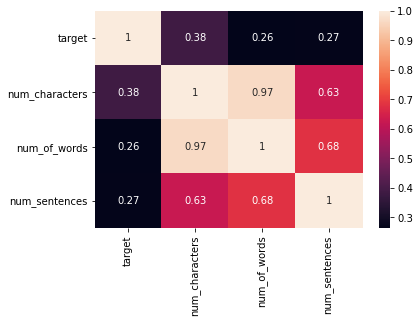

In [33]:
sns.heatmap(df[['target','num_characters','num_of_words','num_sentences']].corr(), annot=True)

if we were to keep only one column out of the columns added recently, we would keep 'num_characters', as it has high correlation with the target. The three columns have co-relation with each other. 

1 is Spam
0 is Ham

## 3. Data Preprocessing
- Lower Case
- Tokenization
- Removing special Characters
- Removing stop words and punctuation
- Stemming 

In [34]:
def transform_text(text):
    text = text.lower() #lower case
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():#if i is alpha numeric
            y.append(i)
            
    text = y[:] #cloning the list
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [35]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\navya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
print(ps.stem('loving'))
print(ps.stem('dancing'))
print(ps.stem('had a loving time'))

love
danc
had a loving tim


In [38]:
transform_text('hi, How arE YOU') #lower case and word tokenize

'hi'

In [39]:
transform_text('hi how are you %% IN SEM EXAM') ##lower case, word tokenize, removal of special characters 

'hi sem exam'

Stopwords do not provide much meaning to the sentences, instead prioritizes in sentence formation.

In [40]:
transform_text('HI! did you like my presentation?') #without the stemming function

'hi like present'

In [41]:
transform_text(df['text'][0]) #the overall output of the function

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [42]:
transform_text(df['text'][100])

'okay name ur price long legal wen pick u ave x am xx'

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_of_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Creating a word cloud means finding the most frequently used words in the text.

Here, we will find a word cloud where the target is 1, i.e. the message is spam, helps in finding the most used words in spam emails.

In [45]:
!pip install wordcloud

In [46]:
pip install --upgrade Pillow

Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install --upgrade pip

   ---------------------------------------- 1.8/1.8 MB 11.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.1
    Uninstalling pip-24.1.1:
      Successfully uninstalled pip-24.1.1
Note: you may need to restart the kernel to use updated packages.


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size = 10, background_color='white')

In [49]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

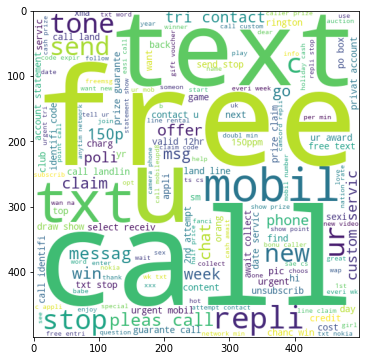

In [50]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [51]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

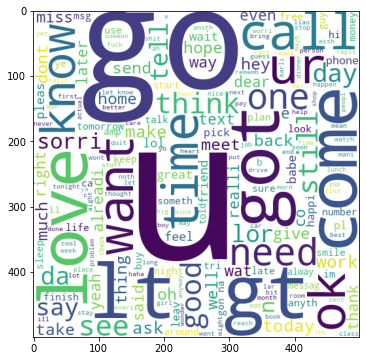

In [52]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

Now, we will see the top 30 most used words of ham and spam emails.

In [53]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9939

C:\Users\navya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

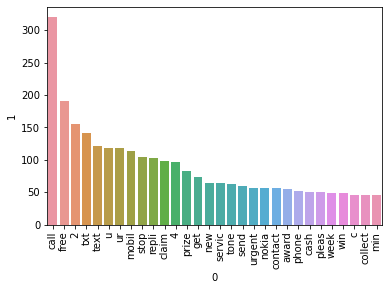

In [55]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [56]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

35402

C:\Users\navya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'love'),
  Text(13, 0, 'ok'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

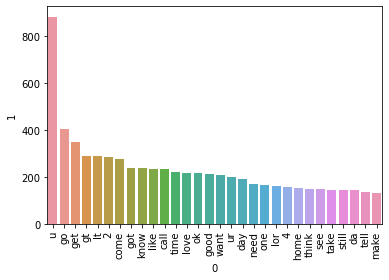

In [58]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

## 4. Model Building

In [96]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [97]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [99]:
y = df['target'].values

In [100]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

Naive Bayes algorithm is used when the dataset uses sentences as the input or output. The input text needs to be turned to vector numeric instead of string as ML Model only deal with numbers.

In [104]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [105]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [106]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8597678916827853
[[769 130]
 [ 15 120]]
0.48


In [107]:
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

#since the dataset is imbalanced, precision is preferred over accuracy

0.9806576402321083
[[895   4]
 [ 16 119]]
0.967479674796748


In [108]:
bnb.fit(X_train, y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9700193423597679
[[898   1]
 [ 30 105]]
0.9905660377358491


In [71]:
#tfidf -> MNB

!pip install xgboost

In [74]:
pip install --upgrade pandas

In [76]:
pip install --upgrade scikit-learn xgboost

  Using cached xgboost-2.1.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.0-py3-none-win_amd64.whl (124.9 MB)
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.0.1
    Uninstalling xgboost-1.0.1:
      Successfully uninstalled xgboost-1.0.1
Note: you may need to restart the kernel to use updated packages.


In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [110]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [111]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [112]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [113]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.960348162475822, 0.9351851851851852)

In [82]:
pip install --upgrade scikit-learn numpy threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [114]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.960348162475822
Precision -  0.9351851851851852
For  KN
Accuracy -  0.9110251450676983
Precision -  1.0
For  NB
Accuracy -  0.9806576402321083
Precision -  0.967479674796748
For  DT
Accuracy -  0.9129593810444874
Precision -  0.7528089887640449
For  LR
Accuracy -  0.9526112185686654
Precision -  0.9215686274509803
For  RF
Accuracy -  0.9671179883945842
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9439252336448598
For  BgC
Accuracy -  0.9458413926499033
Precision -  0.8376068376068376
For  ETC
Accuracy -  0.9709864603481625
Precision -  0.981651376146789
For  GBDT
Accuracy -  0.9342359767891683
Precision -  0.8316831683168316
For  xgb
Accuracy -  0.9574468085106383
Precision -  0.9099099099099099


In [115]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending= False)

In [116]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.911025,1.000000
5,RF,0.967118,1.000000
8,ETC,0.970986,0.981651
2,NB,0.980658,0.967480
6,AdaBoost,0.961315,0.943925
0,SVC,0.960348,0.935185
4,LR,0.952611,0.921569
10,xgb,0.957447,0.909910
7,BgC,0.945841,0.837607
9,GBDT,0.934236,0.831683


In [117]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.911025
1,RF,Accuracy,0.967118
2,ETC,Accuracy,0.970986
3,NB,Accuracy,0.980658
4,AdaBoost,Accuracy,0.961315
5,SVC,Accuracy,0.960348
6,LR,Accuracy,0.952611
7,xgb,Accuracy,0.957447
8,BgC,Accuracy,0.945841
9,GBDT,Accuracy,0.934236


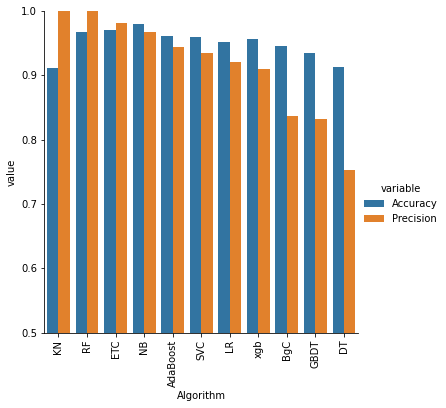

In [118]:
sns.catplot(x = 'Algorithm', y='value', hue='variable', data=performance_df1, kind ='bar', height = 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
#model improving
# 1. change the max_features parameter of tfidf

In [120]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_max_ft_3000':accuracy_scores, 'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000', ascending= False)

In [122]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling', ascending= False)

In [123]:
new_df = performance_df.merge(temp_df, on ='Algorithm')

In [124]:
new_df_scaled = new_df.merge(temp_df, on='Algorithm')

In [125]:
new_df_scaled = new_df.merge(temp_df, on='Algorithm')

In [126]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,KN,0.911025,1.000000,0.911025,1.000000,0.911025,1.000000
1,RF,0.967118,1.000000,0.967118,1.000000,0.967118,1.000000
2,ETC,0.970986,0.981651,0.970986,0.981651,0.970986,0.981651
3,NB,0.980658,0.967480,0.980658,0.967480,0.980658,0.967480
4,AdaBoost,0.961315,0.943925,0.961315,0.943925,0.961315,0.943925
5,SVC,0.960348,0.935185,0.960348,0.935185,0.960348,0.935185
6,LR,0.952611,0.921569,0.952611,0.921569,0.952611,0.921569
7,xgb,0.957447,0.909910,0.957447,0.909910,0.957447,0.909910
8,BgC,0.945841,0.837607,0.945841,0.837607,0.945841,0.837607
9,GBDT,0.934236,0.831683,0.934236,0.831683,0.934236,0.831683


In [127]:
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9806576402321083
0.967479674796748


In [128]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))